# Set up

### Libraries

In [15]:
import pandas as pd
import inflection
import numpy as np
import seaborn as sns

from matplotlib             import pyplot as plt
from IPython.display        import HTML

### Functions

In [16]:




def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

In [17]:
jupyter_settings()

### Import Data

In [43]:
df_train_raw = pd.read_csv('cardio_train.csv', sep=';')

## ETL

### Data Raw status

In [142]:
df1 = df_train_raw.copy()

#### Dados

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code | 1 - women, 2 - men 
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [143]:
df_train_raw.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [144]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [145]:
df1.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Rename Columns

In [146]:
df1.columns
# Snakecase: ok

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

### Change Data Types

In [147]:
# age - Change to years

df1['age'] = round(df1['age'].apply(lambda x: x / 365.25 ), 2)



In [148]:
df1.dtypes

# Types = ok

id               int64
age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

# Feature Engineering

### Data Dimensions

In [149]:
print(f'Number of Rows {df1.shape[0]}')
print(f'Number of Columns {df1.shape[1]}')

Number of Rows 70000
Number of Columns 13


## Exploratory Data Analysis

### Univariate Anaysis

In [150]:
df2 = df1.copy()

In [151]:
                         
# Número                                        'Categorias'
# AGE: Média, mediana, min, max                 gender: women,  men
# height: Média, mediana, min, max              cholesterol:  normal, above, 3: high
# weight: Média, mediana, min, max              gluc:  normal, above, high
# ap_hi: Média, mediana, min, max               smoke: yes, no
# ap_lo: Média, mediana, min, max               alco: yes, no
#                                               active: yes, no

num_attributes = df2.select_dtypes( include=['int64', 'float64'])
cat_attributes = df2.select_dtypes( include=['object'])


In [152]:
#Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean)).T
ct2 = pd.DataFrame( num_attributes.apply( np.median)).T

# Dispersion -std, min, max, range, skew, Kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std )).T
d2 = pd.DataFrame( num_attributes.apply( np.min )).T
d3 = pd.DataFrame( num_attributes.apply( np.max )).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew()  )).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() )).T

#Concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
m.columns = ['attibutes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attibutes,min,max,range,mean,median,std,skew,kurtosis
0,id,0.00,99999.00,99999.00,49972.419900,50001.50,28851.096242,-0.001278,-1.198374
1,age,29.56,64.92,35.36,53.302869,53.94,6.754925,-0.307069,-0.823435
2,gender,1.00,2.00,1.00,1.349571,1.00,0.476835,0.630960,-1.601935
3,height,55.00,250.00,195.00,164.359229,165.00,8.210068,-0.642187,7.943653
4,weight,10.00,200.00,190.00,74.205690,72.00,14.395654,1.012070,2.586825
5,ap_hi,-150.00,16020.00,16170.00,128.817286,120.00,154.010319,85.296214,7580.074738
6,ap_lo,-70.00,11000.00,11070.00,96.630414,80.00,188.471184,32.114083,1425.914585
7,cholesterol,1.00,3.00,2.00,1.366871,1.00,0.680245,1.587123,0.993901
8,gluc,1.00,3.00,2.00,1.226457,1.00,0.572266,2.397462,4.294377
9,smoke,0.00,1.00,1.00,0.088129,0.00,0.283482,2.905867,6.444250


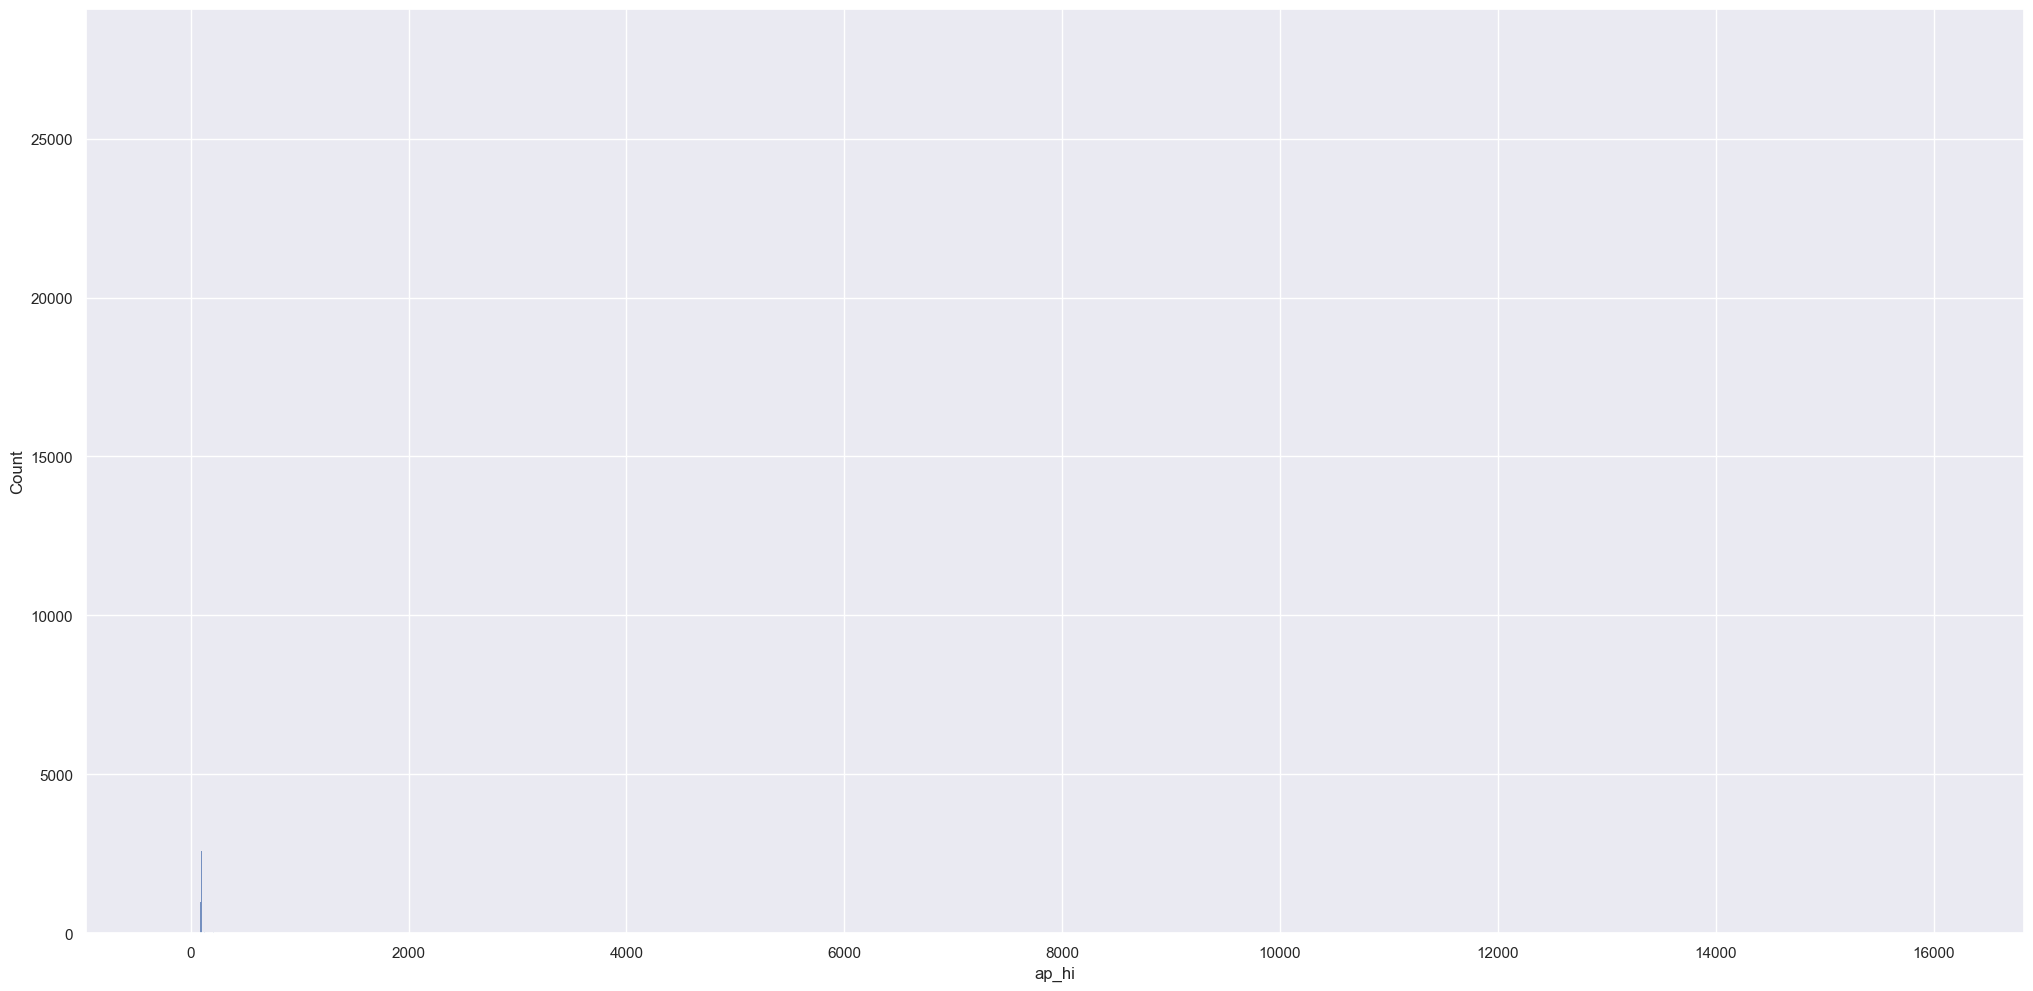

In [168]:
# aux1= df1[(df1['state_holiday']!= 0 ) & (df1['sales'] > 0 )]

sns.histplot(df1['ap_hi']);

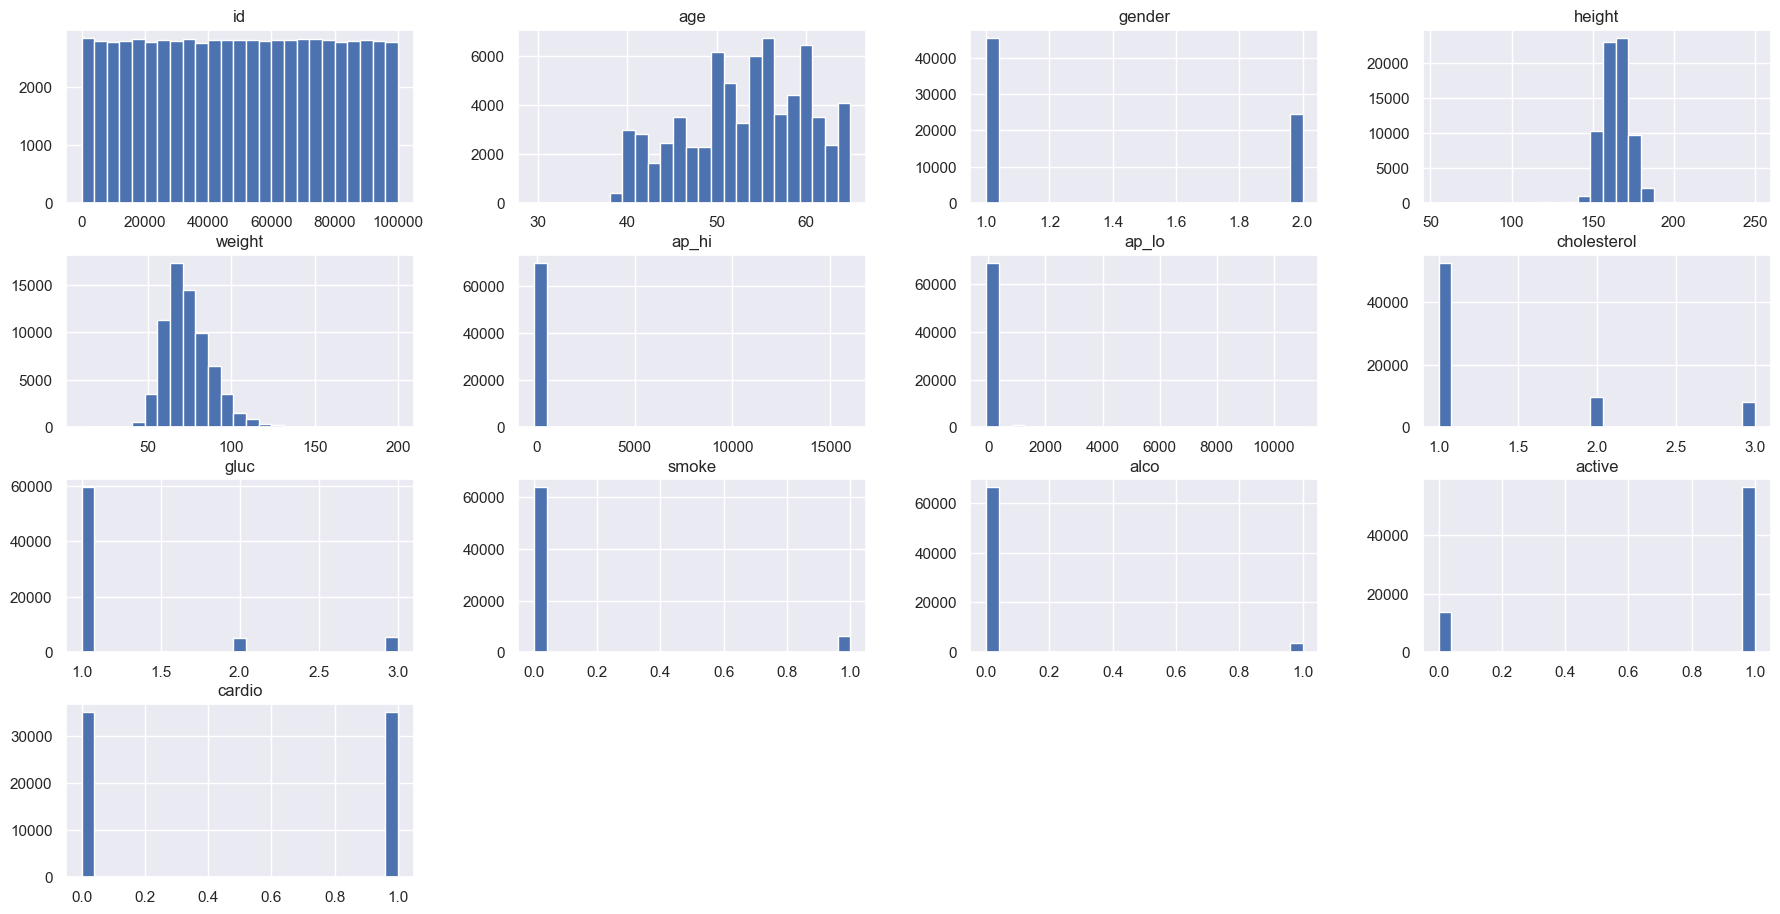

In [153]:
num_attributes.hist( bins=25, figsize=(22,11) );

#### Fixing Variable | Categorical Analysis

In [154]:
# 'Categorias'
# gender: 1, 2 | 1 - women, 2 - men
# cholesterol: 1, 2, 3 | 1: normal, 2: above normal, 3: well above normal
# gluc: 1, 2, 3 | 1: normal, 2: above normal, 3: well above normal
# smoke: 1, 0 
# alco: 1, 0
# active: 1, 0


df2['gender'] = df2['gender'].apply(lambda x: 'women' if x == 1 else 'men')
df2['smoke'] = df2['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')
df2['alco'] = df2['smoke'].apply(lambda x: 'yes' if x == 1 else 'no')
df2['active'] = df2['active'].apply(lambda x: 'yes' if x == 1 else 'no')
df2['cardio'] = df2['cardio'].apply(lambda x: 'yes' if x == 1 else 'no')

In [155]:
df2['cholesterol'] = df2['cholesterol'].map({1: 'normal', 2: 'above', 3: 'high'})
df2['gluc'] = df2['gluc'].map({1: 'normal', 2: 'above', 3: 'high'})

In [156]:
df2.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,men,168,62.0,110,80,normal,normal,no,no,yes,no
1,1,55.38,women,156,85.0,140,90,high,normal,no,no,yes,yes
2,2,51.63,women,165,64.0,130,70,high,normal,no,no,no,yes
3,3,48.25,men,169,82.0,150,100,normal,normal,no,no,yes,yes
4,4,47.84,women,156,56.0,100,60,normal,normal,no,no,no,no


In [2]:
plt.subplot(1, 6, 1)
sns.boxplot(x='cholesterol', y='age', data=df2);

plt.subplot(1, 6, 2)
sns.boxplot(x='gluc', y='age', data=df2);

plt.subplot(1, 6, 3)
sns.boxplot(x='smoke', y='age', data=df2);

plt.subplot(1, 6, 4)
sns.boxplot(x='alco', y='age', data=df2);

plt.subplot(1, 6, 5)
sns.boxplot(x='active', y='age', data=df2);

plt.subplot(1, 6, 6)
sns.boxplot(x='cardio', y='age', data=df2);

NameError: name 'plt' is not defined

### Mental Map

### Hyphoteses List



#### Bivariate Analysis

#### More Relevant

##### 1

#### Less Relevant

##### l

### Multivariate Analysis

#### Numerical Attributes

#### Categorical Attributes

# Data Preparation